<a href="https://colab.research.google.com/github/lavillegas/pythonfinanzaseafit/blob/master/Clase_7_modificada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/b/bf/EAFIT-2015.png" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado Python para Finanzas</h1>




<p><a name="contents"></a></p>

# Contenido Clase 7


- <a href="#var">1. Introducción al Machine Learning</a><br>
- <a href="#backtesting">2. Introducción a Scikit-Learn</a><br>
- <a href="#interes">3. Aprendizaje Supervisado: Regresión Lineal</a><br>
- <a href="#risk">4.Taller Regresiones</a><br>
- <a href="#metrics">5. Métricas</a><br>
- <a href="#beta">6. Gradiente Descendiente</a><br>
- <a href="#regpol">7. Regresión polinómica</a><br>
- <a href="#nol">8. Modelos no lineales</a><br>
- <a href="#elastic">9. Redes elásticas</a><br>
- <a href="#support">10. Support Vector Machine: Regresión</a><br>
- <a href="#support">11. Selección de Modelos</a><br>


<p><a name="ML"></a></p>

# 1.0. Introducción al  Machine Learning

[Contenidos](#contents) 

El Machine Learning (Aprendizaje de Máquina) evolucionó como un subcampo de la inteligencia artificial enfocado al desarrollo de algoritmos capaces de extraer conocimiento de diferentes volumenes de data con el propósito de hacer predicciones.

En lugar de requerir que las personas deriven reglas y modelos por si mismos el ML permite adquirir este conocimiento  partir de la mejor gradual de modelos predictivos. Las diferentes aplicaciones del ML en el día a día incluyen filtros de spam, reconocimiento de voz e imagenes y el sistema de reocmendación de netflix.

<p><a name="terms"></a></p>

## 1.1. Terminología

[Contenidos](#contents)

Existen conceptos clave que sientan las bases para una mejor comprensión del ML. Aprenderemos la nomenclatura (términos estándar) que se utiliza para describir los datos, así como los términos utilizados para describir el aprendizaje y el modelado.


La estructura tradicional para los datos en el campo del ML tienen la siguiente forma:

![picture](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2013/12/Table-of-Data-Showing-an-Instance-Feature-and-Train-Test-Datasets.png)

* **Instancia**: A una sola fila de datos se le llama instancia. También se le conoce como una observación.
* **Característica** (Feature): A una sola columna de datos se le llama característica. Algunas características pueden ser entradas a un modelo (predictores) y otras pueden las características a predecir (también llamadas *labels*).
* **Datos de entrenamiento**: Conjunto de datos que introducimos a nuestro algoritmo para entrenar nuestro modelo.
* **Datos de prueba**: Conjunto de datos que utilizamos para validar la precisión de nuestro modelo pero que no se utiliza para entrenarlo. 

Otros términos que utilizaremos frecuentemente son:

* **Parámetros del modelo**: Son aquellos que pertenecen al modelo utilizado para realizar el procedimiento de ajuste
* **Hiperparámetros**: Es un parámetro de un algoritmo de aprendizaje (no del
modelo). Como tal, no se ve afectado por el algoritmo de aprendizaje en sí; debe establecerse antes
al entrenamiento y permanece constante durante el entrenamiento.
* **Métrica**: Medida cuantitativa usada para evaluar el rendimiento del algoritmo.


<p><a name="supML"></a></p>

## 1.2. Aprendizaje supervisado

[Contenidos](#contents)

El aprendizaje supervisado implica modelar la relación entre las características de los datos y alguna etiqueta asociada a estos; una vez que se determina el modelo, se puede usar para asociar etiquetas a datos nuevos y desconocidos. El aprendizaje supervisado se subdivide en clasificación y regresión: En clasificación se tienen etiquetas discretas, mientras que en la regresión, las etiquetas son cantidades continuas.

### 1.2.1 Clasificación: Prediciendo etiquetas discretas.

En clasificación, tenemos un conjunto de puntos etiquetados (clasificados) y deseamos utilizarlos para clasificar algunos puntos no etiquetados (no clasificados). Imaginemos que tenemos los datos que se muestran en la siguiente figura

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-classification-1.png)

Tenemos dos características para cada punto, representadas por las posiciones (x, y). Además, tenemos una de las dos etiquetas de clases para cada punto, representadas por los colores de los puntos. A partir de estas características y etiquetas, nos gustaría crear un modelo que nos permita decidir si un nuevo punto debe etiquetarse como "azul" o "rojo". 

Un posible modelo es asumir que los dos grupos pueden separarse dibujando una línea recta a través del plano entre ellos, de modo que los puntos a cada lado de la línea caen en el mismo grupo.

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-classification-2.png)

Los valores óptimos para estos parámetros se aprenden de los datos (este es el "aprendizaje" en ML), que a menudo se denomina *entrenar el modelo*. Ahora que el modelo ha sido entrenado, se puede generalizar a datos nuevos sin etiquetas. Esta etapa generalmente se llama *predicción*.


<p><a name="nonsupML"></a></p>

## 1.3. Aprendizaje no supervisado

[Contenidos](#contents)


El aprendizaje no supervisado implica modelos que describen datos sin referencia a cualquier etiqueta conocida. Un caso común de aprendizaje no supervisado es el de *agrupamiento* (clustering) en el que los datos se asignan automáticamente a un cierto número de grupos discretos. Por ejemplo, podríamos tener algunos datos bidimensionales

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-clustering-1.png)

A simple vista, está claro que cada uno de estos puntos es parte de un grupo distinto. Dada esta entrada, un modelo de clustering utilizará la estructura intrínseca de los datos para determinar qué puntos están relacionados, con un resultado como el siguiente

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-clustering-2.png)

Algunos algoritmos de aprendizaje no supervisado son:

* Agrupamiento
  * Jerárquico
  * Basado en densidad
  * k-medias
* Detección de anomalías
* Visualización y reducción dimensional


<p><a name="data"></a></p>

## 1.4. Consideraciones sobre los Datos en ML

[Contenidos](#contents)

* **Cantidad insuficiente de datos de entrenamiento**: Se necesitan muchos datos para que la mayoría de los algoritmos de ML funcionen correctamente. Incluso para problemas muy simples, generalmente se necesitan miles de ejemplos, y para problemas complejos como el reconocimiento de imágenes o de voz puede necesitarse millones de ejemplos. 

* **Datos de entrenamiento no representativos**: Es crucial que los datos de entrenamiento sean representativos de los nuevos casos que desea generalizar. Al usar un conjunto de entrenamiento no representativo, entrenamos un modelo con el cual es poco probable obtener predicciones precisas. Incluso muestras muy grandes pueden no ser representativas si el método de muestreo es defectuoso.

* **Datos de baja calidad**: Obviamente, si los datos de entrenamiento están llenos de errores, valores atípicos y ruido  será más difícil para el algoritmo detectar los patrones subyacentes.

* **Características irrelevantes**: El sistema solo será capaz de aprender si los datos de entrenamiento contienen suficientes características relevantes  parte fundamental del éxito de un proyecto de ML es crear un buen conjunto de características, este proceso se conoce como ingeniería de características. 



<p><a name="sklearn"></a></p>

# 2.0. Introducción a Scikit-Learn

[Contenidos](#contents) 




<p><a name="sklearnG"></a></p>

## 2.1 Generalidades

Uno de las bibliotecas  más conocidas es Scikit-Learn, un paquete que proporciona versiones eficientes de una gran cantidad de algoritmos comunes. Scikit-Learn se caracteriza por ser una API limpia, uniforme y optimizada, así como por una documentación en línea muy útil y completa. Los principales principios de diseño son:

* **Estimadores**: Cualquier objeto que pueda estimar algunos parámetros basados en un conjunto de datos se llama *estimador*. La estimación en sí misma se realiza mediante el método `fit()`, y solo toma un conjunto de datos como parámetro (o dos para algoritmos de aprendizaje supervisados; el segundo conjunto de datos contiene las etiquetas). Cualquier otro parámetro necesario para guiar el proceso de estimación se considera un hiperparámetro.


* **Transformadores**: Algunos estimadores (como el imputer) también pueden transformar un conjunto de datos; Estos se llaman transformadores. Una vez más, la API es bastante simple: la transformación se realiza mediante el método `transform()` con el conjunto de datos para transformar como parámetro. Los transformadores también tienen un método conveniente llamado `fit_transform()` que es equivalente a llamar a `fit()` y luego aplicar `transform()`

In [ ]:
imp = SimpleImputer(strategy='most_frequent')
transformed_data = pd.DataFrame(imp.fit_transform(X))

* **Predictores**: Finalmente, algunos estimadores son capaces de hacer predicciones dado un conjunto de datos; Estos se conocen como predictores. Un predictor tiene un método `predict()` que toma un conjunto de datos de nuevas instancias y devuelve un conjunto de datos de predicciones correspondientes. También tiene un método `score()` que mide la calidad de las predicciones dado un conjunto de prueba. (El modelo `LinearRegression` que veremos más adelante es un ejemplo de un predictor)


<p><a name="sklearnT"></a></p>

## 2.2 Tratamiento de datos

El ML busca en principio crear modelos a partir de datos. Por esta razón, comenzaremos discutiendo algunos aspectos necesarios del tratamiento de los datos previos a la aplicación del algoritmo de ML en sklearn

In [1]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/social_data.csv').dropna() 
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1.0,0.0,2.0,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,2.0,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,2.0,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,2.0,Cuba,<=50K


<p><a name="sklearnTT"></a></p>

### 2.2.1 Datos de entrenamiento y de prueba

Comencemos por crear la matriz de características **X** y el vector de etiquetas **y**. Supongamos que en este caso queremos predecir la característica "age":

In [2]:
#Quitamos del dataframe el target age y generamos
# la matriz de caracteristicas X
X = df.drop("age", axis=1)
X.shape

(29072, 14)

In [3]:
#Generamos el vector de target
y = df["age"]
y.shape

(29072,)




Generalmente se elige el 20% de los datos para la prueba y el resto para el entrenamiento. Los datos se deben dividir eligiendo los datos de manera aleatoria. Existen varias maneras de realizar este proceso

   1) Crear una función que seleccione el 20% de los datos aleatoriamente.
      
   2) De la librería `sklearn.model_selection` usar las funciones:
      
      * train_test_split
       
      * StratifiedShuffleSplit 
      
La primera función dividirá los datos en los mismos índices (esto es muy útil, por ejemplo, si tenemos un DataFrame separado para las etiquetas). La segunda función hace lo que se conoce como un muestreo estratificado, el cual se usa en el caso de que no haya suficientes datos y queramos evitar introducir sesgos

<p><img alt="comparison  logo" width="400" height="260" src="https://www.webyempresas.com/wp-content/uploads/2019/03/En-qu%C3%A9-consiste-el-muestreo-estratificado.jpg"
" align="center" hspace="10px" vspace="0px"></p>







In [4]:
# Cuando tengamos una cantidad de datos tal que estemos seguros que no introduciremos un sesgo
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) # random_state nos permite establecer una semilla 

print("Dimensiones de la data de entrenamiento")
print(x_train.shape,y_train.shape)
print("Dimensiones de la data de prueba")
print(x_test.shape,y_test.shape)

Dimensiones de la data de entrenamiento
(23257, 14) (23257,)
Dimensiones de la data de prueba
(5815, 14) (5815,)


In [5]:
#Aplicamos un muestreo estratificado en que caso de que no hayan suficientes datos
from sklearn.model_selection import StratifiedShuffleSplit

s = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=40)

for train_index, test_index in s.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
  
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(23257, 14) (23257,)
(5815, 14) (5815,)


<p><a name="sklearnCT"></a></p>

### 2.2.2 Conversión de variables categóricas

Para la conversión de variables categóricas, sklearn ofrece los módulos `OrdinalEncoder` y `OneHotEncoder`

In [6]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capitalgain       float64
capitalloss       float64
hoursperweek      float64
native-country     object
class              object
dtype: object

In [7]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df[["education"]])
df_cat_encoded

array([[ 9.],
       [ 9.],
       [11.],
       ...,
       [12.],
       [11.],
       [11.]])

In [8]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
#cat_encoder = OneHotEncoder(sparse=False)
df_cat_1hot = cat_encoder.fit_transform(df[["sex"]])
df_cat_1hot

<29072x2 sparse matrix of type '<class 'numpy.float64'>'
	with 29072 stored elements in Compressed Sparse Row format>

Por defecto el `OneHotEncoder` retorna una matriz dispersa (sparse). Muchos de los estimadores de Sklearn aceptan entradas de este tipo al ajustar y evaluar modelos. 

<p><a name="sklearnFS"></a></p>

### 2.2.3 Escalado de características

Los algoritmos de ML no funcionan bien cuando los atributos numéricos de entrada tienen escalas muy diferentes (o en algunos algortimos las entradas deben estar normalizadas). Para esto, Scikit-Learn tiene dos funciones para que todos los atributos tengan la misma escala: 

* Normalización  $$
           x'=\frac{x-x_{min}}{x_{max}-x_{min}}.
           $$ 




In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(df[["age"]],df[["hoursperweek"]])

array([[0.5 ],
       [0.75],
       [0.5 ],
       ...,
       [0.5 ],
       [0.75],
       [0.75]])

* Estandarización:$$    x'=\frac{x-\bar x}{\sigma}    $$

In [10]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
sscaler.fit_transform(df[["age"]],df[["hoursperweek"]])

array([[0.19126418],
       [0.9827848 ],
       [0.19126418],
       ...,
       [0.19126418],
       [0.9827848 ],
       [0.9827848 ]])

<p><a name="sklearnPL"></a></p>

### 2.2.4 Pipeline (Tubería)

Un *Pipeline* es una secuencia de transformaciones que se utilizan para automatizar flujos de trabajo. Los pipelines son muy comunes en los sistemas de ML, ya que hay muchos datos para manipular y muchas transformaciones de datos para aplicar. Sklearn proporciona la clase `Pipeline`. En el siguiente ejemplo crearemos un pipeline para 

1) Reemplazar los valores nulos por la media 

2) Estandarizar los datos.


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

df_age_pipe = num_pipeline.fit_transform(df[["age"]])

trans_age = pd.DataFrame(df_age_pipe)
trans_age.head()

,0
0,0.191264
1,0.982785
2,0.191264
3,0.982785
4,-0.600256


<p><a name="regresion"></a></p>

# 3.0. Aprendizaje Supervisado: Regresión lineal

[Contenidos](#contents) 

## 3.1 Regresión lineal simple
<p><a name="simple"></a></p>

Para iniciar nuestro estudio de los algoritmos de regresión empezaremos por  la regresión lineal.

Recordemos que  la ecuación de una línea recta está dada por la ecuación

$$y = m*x+b$$

Donde $y$ es la variable dependiente, $x$ la independiente y a $m$ y $b$ las llamamos pendientes e intercepto.

En el ambito del ML solemos reescribir la ecuación como

$$y=w_0+w_1x$$

siendo $w_0$ y $w_1$ llamados los "parámetros del modelo"



Así:  ¿ Dados un conjunto de datos $(x,y)$, ¿Cuáles son los parámetros para una línea que mejor representan *el conjunto* de datos?

En otras palabras, queremos encontrar los $w_i$ que mínimicen el error al predecir $y$ dado un $x$

![Imagen tomada de medium.com](https://miro.medium.com/max/642/1*xxxqZtZExBJoxmYKIY-waw.png)

Existen varios algoritmos para resolver ésta tarea, el más simple es usar el algorítmo de mínimos cuadrados.

El algoritmo encuentra los parámetros que minimizan la el error cuadrado conjunto (la suma) entre nuestras predicciones y los valores reales.

![Imagen tomada de /www.jmp.com](https://qph.fs.quoracdn.net/main-qimg-3b0d7655ac76edf1241f97015ee755b4)

Sklearn cuenta con una sublibrería completa para los modelos lineales llamada "linear_model".


In [12]:
import pandas as pd
import numpy as np

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

In [13]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Usaremos el tamaño del motor para crear un modelo sencillo para el precio del auto.

In [14]:
#separemos nuestros datos en features y label
X = df['engine-size'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

linear  = LinearRegression(normalize=True)
linear.fit(X_train,y_train)
print('R2 =',linear.score(X_test,y_test))


R2 = 0.7735450111026795


In [16]:
print('w1 =',linear.coef_)
print('w0 =',linear.intercept_)

w1 = [[174.5482757]]
w0 = [-8836.38107893]


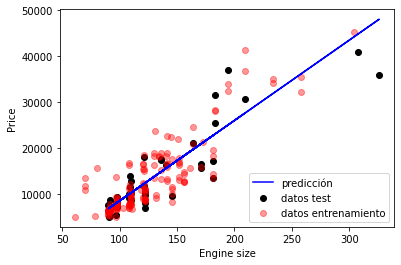

In [17]:
y_pred = linear.predict(X_test)

plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred, color='blue',label=r'predicción')
plt.legend(loc='lower right')

plt.xlabel(r'Engine size')
plt.ylabel(r'Price')

plt.show()


## 3.2 Regresión lineal multiple
<p><a name="multiple"></a></p>


Normalmente los problemas de ML no son tan simples y los datos están compuestos de muchos predictores. En éstos casos podemos usar también el algorítmo de regresión lineal, haciendo una extensión de la ecuación de la linea a más dimensiones:
$$y=w_0+w_1x_1+w_2x_2+...+w_nx_n$$

Donde $n$ será la cantidad de variables predictoras en nuestros datos y de nuevo $w_i$ será el **peso** del predictor $x_i$.

En éstos casos ya no tendremos una línea sino un **plano** o **hiperplano** como modelo.

### Un ejemplo de 2 predictores (3D)

Usemos ahora el tamaño del motor y el peso vacío como predictores del precio.

In [18]:
X = df[['engine-size','curb-weight']]
y = df['price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

linearM  = LinearRegression(normalize=True)
linearM.fit(X_train,y_train)
print('R2 =',linearM.score(X_test,y_test))

R2 = 0.8138779449118414


In [20]:
print('w1, w2 =',linearM.coef_)
print('w0 =',linearM.intercept_)

w1, w2 = [117.18848596   4.97221762]
w0 = -14334.771686602337


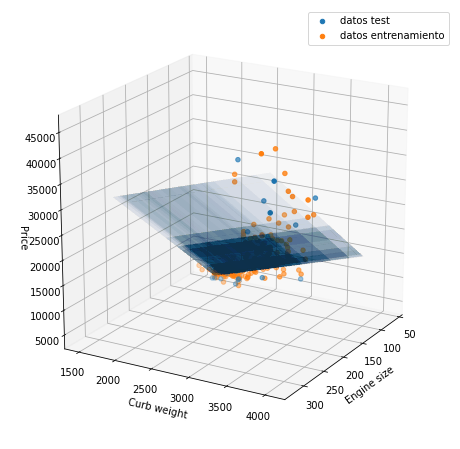

In [21]:
#Grafiquemos el plano que minimiza el error

from mpl_toolkits.mplot3d import Axes3D

xx,yy = np.meshgrid(X_test['engine-size'].values, X_test['curb-weight'].values)
zz = linearM.intercept_+linearM.coef_[0]*xx+linearM.coef_[1]*yy

sc = plt.figure(figsize=(8,8)).gca(projection='3d')
sc.scatter(X_test['engine-size'], X_test['curb-weight'], y_test,label=r'datos test')
sc.scatter(X_train['engine-size'], X_train['curb-weight'], y_train,label=r'datos entrenamiento')
sc.plot_surface(xx, yy, zz, alpha=0.01)
sc.legend()

sc.view_init(elev=20, azim=30)
sc.set_xlabel('Engine size')
sc.set_ylabel('Curb weight')
sc.set_zlabel('Price')
plt.show()

*LinearRegression* usa el método de mínimos cuadrados, ésto hace que los parámetros estimados dependan fuertemente de la independencia de las características.

Cuando las columnas están fuertemente correlacionadas, llamado multicolinealidad,  el algorítmo de mínimos cuadrados es altamente sensible a variaciones aleatorias en la variable diana, haciendo que la varianza sea bastante grande.



## 3.3 Otros estimadores lineales

Dado el problema de multicolinealidad del algorírmo de mínimos cuadrados podemos mencionar dos opciones que vienen implementadas también en sklearn:

*   Regresión Ridge
*   Regresión Lasso




#### 3.3.1 Regresión Ridge
<p><a name="ridge"></a></p>

En éste típo de algoritmo se impondrá una penalidad sobre los coeficientes calculados, de tal manera que se modificará el error de los mínimos cuadrados como:

$$\sum (Y_i-\hat Y_i)^2+\alpha \sum w_i^2 $$


El hiperparámetro $\alpha$, llamado complejidad, controla qué tanto se penaliza los coeficientes, haciendo que éstos sean más pequeños y por tanto estabilizando las soluciones aunque a costa de una menor sensibilidad a los datos. La regresión ridge es particularmente buena mejorando las estimaciones de minimos cuadrados cuando hay multicolinealidad presente, esto lo logra al imponer una penalidad sobre el tamaño de los coeficientes.



Para comparar entrenemos un modelo LinearRegresor y uno Ridge con todos los datos

In [22]:
df.dropna(inplace=True)
X = df[['symboling', 'normalized-losses', 'wheel-base', 'length',
       'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'city-L/100km',  'diesel', 'gas']]
y = df['price']

In [23]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

#modelo OLS
print("Modelo OLS")
linearM  = LinearRegression(normalize=True)
linearM.fit(X_train,y_train)
print('R2 OLS =',linearM.score(X_test,y_test))
print('wi OLS =',linearM.coef_)
print('w0 OLS =',linearM.intercept_)

print("--------------------------------")
#Modelo Ridge
print("Modelo Ridge")
ridge  = Ridge(alpha=1,normalize=True)
ridge.fit(X_train,y_train)
print('R2 Ridge =',ridge.score(X_test,y_test))
print('wi Ridge =',ridge.coef_)
print('w0 Ridge =',ridge.intercept_)

Modelo OLS
R2 OLS = 0.8435359669008109
wi OLS = [ 3.21614312e+01 -1.03220246e+01  1.41118840e+02 -2.23572818e+04
  4.32821190e+04  1.74105227e+02 -1.52039826e-01  1.11924260e+02
 -9.95886066e+01 -2.85373944e+03  6.92164686e+02  2.32587030e+01
  1.80134818e+00  2.27747260e+01  2.17008482e+02  1.52150525e+03
 -1.84019329e+03  1.84019329e+03]
w0 OLS = -76507.00943884654
--------------------------------
Modelo Ridge
R2 Ridge = 0.7133951662369991
wi Ridge = [ 7.37216191e+01 -3.83731882e-01  6.53044658e+01  5.87166942e+03
  2.54199023e+04  2.68756816e+01  1.45468267e+00  3.67838020e+01
  1.19095810e+03 -4.71217393e+02  8.08538699e+01  2.89763652e+01
  3.06326189e-01 -5.65004684e+01 -5.56486013e+01  3.61066213e+02
  8.67411260e+02 -8.67411260e+02]
w0 Ridge = -38835.23676298204


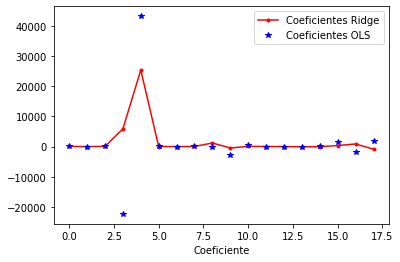

In [24]:
#Comparemos los coefcientes de ambos modelos
plt.figure()
plt.plot(ridge.coef_,'r.-',label=r'Coeficientes Ridge')
plt.plot(linearM.coef_,'b*',label=r'Coeficientes OLS')
plt.legend()
plt.xlabel(r'Coeficiente')
plt.show()

Vemos que en el caso del dataset para autos con un valor de $\alpha = 1$ se nota una pequeña variación en los parámetros y la precisión del modelo.

+ El modelo se hace robusto a variaciones de los predictores, pero pierde un poco de precisión

+ En general el hiperparámetro $\alpha$ debe ser  buscado con varios experimentos.


#### 3.3.2 Regresión Lasso
<p><a name="lasso"></a></p>

Al igual que el algorítmo Ridge, Lasso impone una penalidad sobre la función de error del OLS, pero ésta en cambio está dada por el valor absoluto de los coeficientes, así:
$$\sum (Y_i-\hat Y_i)^2+\alpha \sum |w_i|$$

Esto hace que a diferencia de Ridge que buscaba hacer pequeños los valores de algunos $w_i$, Lasso fuerza a que sean 0.

Así, puede decirse que:

+  Ridge es bueno cuando esperamos que todos los predictores tengan una influencia sobre el predictor así sea pequeña.

+ Lasso se usará cuando esperamos que el numero de predictores relevantes sea pequeño (predictores con peso diferente de 0).

Para implementar una regresión tipo Lasso se sigue el mismo esquema de los casos anteriores.

In [25]:
from sklearn.linear_model import Lasso

#modelo Lasso
lasso  = Lasso(alpha=10,normalize=True)
lasso.fit(X_train,y_train)
print('R2 Lasso =',lasso.score(X_test,y_test))
print('wi Lasso =',lasso.coef_)
print('w0 Lasso =',lasso.intercept_)

R2 Lasso = 0.8360932068188104
wi Lasso = [-0.00000000e+00 -3.19883868e+00  0.00000000e+00 -0.00000000e+00
  3.43182211e+04  1.19391461e+02  0.00000000e+00  1.20148466e+02
 -0.00000000e+00 -2.49132114e+03  3.08466036e+02  2.00496318e+01
  1.51785391e+00  0.00000000e+00  0.00000000e+00  5.19565705e+02
  0.00000000e+00 -0.00000000e+00]
w0 Lasso = -49559.07715934429


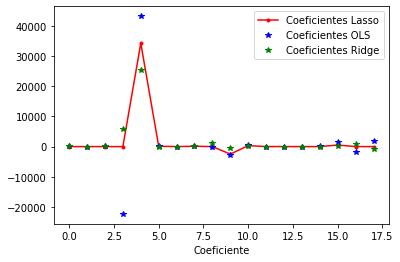

In [26]:
plt.figure()
plt.plot(lasso.coef_,'r.-',label=r'Coeficientes Lasso')
plt.plot(linearM.coef_,'b*',label=r'Coeficientes OLS')
plt.plot(ridge.coef_,'g*',label=r'Coeficientes Ridge')
plt.legend()
plt.xlabel(r'Coeficiente')
plt.show()

In [27]:
print('numero de coeficientes:',len(linearM.coef_))
print('numero de coeficientes diferentes a cero para Ridge:',len(ridge.coef_[ridge.coef_!=0]))
print('numero de coeficientes diferentes a cero para Lasso:',len(lasso.coef_[lasso.coef_!=0]))

numero de coeficientes: 18
numero de coeficientes diferentes a cero para Ridge: 18
numero de coeficientes diferentes a cero para Lasso: 9


Como vemos, Lasso ha disminuído el número de coeficientes mientras que Ridge no lo hace.

La elección entre éstos 3 tipos de regresión lineal depende fuertemente de nuestro dataset (sus correlaciones), nuestro conocimiento del campo (relaciones esperadas de las variables predictoras y la variable target) y nuestras necesidades computacionales.

<p><a name="taller"></a></p>

# 4.0. Taller Regresiones: Moneyball

[Contenidos](#contents) 

![Imagen tomada de /www.jmp.com](https://waydev.co/wp-content/uploads/2020/01/moneyball-git-analytics.jpg)



En este taller vamos a utilizar regresiones lineales para predecir el desempeño de una temporada de baseball profesional




In [28]:
import pandas as pd
# Cargando el dataset
df_moneyball=pd.read_csv('https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/baseball.csv')

#Inspeccionando el dataset
df_moneyball.head()


,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [29]:
df_moneyball.shape

(1232, 15)

 ## Hablemos de Baseball

Estos son los principales atributos de nuestro DataFrame

+ RS — Carreras Anotadas
+ RA — Carreras permitidas
+ W — Victorias
+ OBP — Porcentaje en Base
+ SLG — Porcentaje slugging (productividad de bateo)
+ BA — Promedio de bateo
+ Playoffs — Indica si un equipo llegó a los playoffs
+ OOBP — Porcentaje en base de los oponentes
+ OSLG — Porcentaje de Slugging de los oponentes


Veamos una descripcion breve de algunos de estos términos:

+ OBP — Porcentaje en Base: Esta estadistica mide que tan frecuente un bateadro alcanza una base.
+ SLG — Porcentaje Slugging: Medida de productividad del bateo, mide que tan lejos llega un bateador por bateo 
+ BA — Promedio de Bateo: Numero de hits por posicion de bateo, mide la probabilidad de que un bateador golpee la bola.

## Pregunta 1

Añada una nueva columna llamada RD, la cual muestre la diferencia entre RS y RA (Carreras anotadas - Carreras permitidas)

Luego haga un filtro para conservar la data previa al año 2002, momento en que la doctrina moneyball comienza a tomar furor. Nombre a este dataframe "df_clean"



In [33]:
# Desarrolle aqui su ejercicio
df_moneyball["RD"]=df_moneyball["RS"]-df_moneyball["RA"]
df_clean = df_moneyball[df_moneyball.Year < 2002]
df_clean.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

df_moneyball["RD"]=df_moneyball["RS"]-df_moneyball["RA"]
df_clean=df_moneyball[df_moneyball.Year < 2002]
df_clean.head()

--->

## Pregunta 2: Análisis Exploratorio

Tanto en el libro como en la pelicula, se afirmaba que los Atleticos de Oaklkand necesitaban ganar 99 juegos para participar en los playoffs. Usando seaborn y las pistas, desarrolle un grafico de dispersion (Con eje x victorias y eje y carreras anotadas) para inspeccionar si esta teoría es cierta:

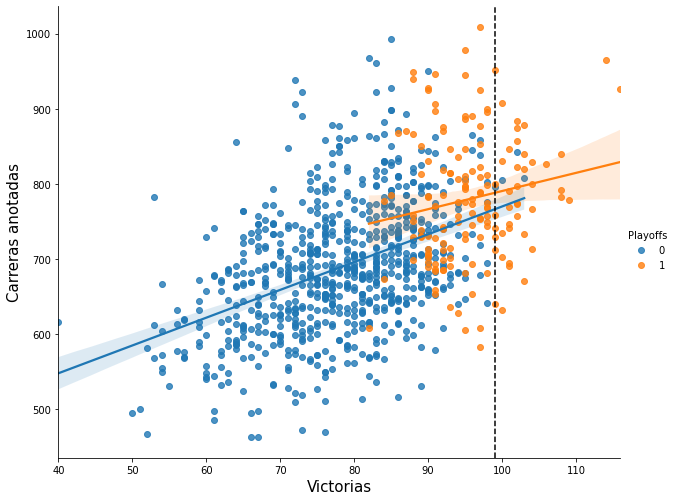

In [40]:
# Pista
import seaborn as sns
import matplotlib.pyplot as plt

#utilice el grafico sns.lmplot() con el argumento hue="playoffs"

sns.lmplot(x = "W", y = "RS", fit_reg = True, hue = "Playoffs", data=df_clean,height=7, aspect=1.25)
plt.xlabel("Victorias", fontsize = 15)
plt.ylabel("Carreras anotadas", fontsize = 15)
plt.axvline(99, 0, 1, color = "Black", ls = '--')
plt.show()

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x = "W", y = "RS", fit_reg = False, hue = "Playoffs", data=df_clean,height=7, aspect=1.25)
plt.xlabel("Victorias", fontsize = 20)
plt.ylabel("Carreras anotadas", fontsize = 20)
plt.axvline(99, 0, 1, color = "Black", ls = '--')
plt.show()


--->

## Pregunta 4: ¿Cómo lograr 99 victorias?

Dibuje un grafico de dispersión, con las victorias en el eje y la diferencia de carreras en el eje x, que valor aproximada de diferencias de carreras deberia alcanzar un equipo para lograr las 99 victorias? 

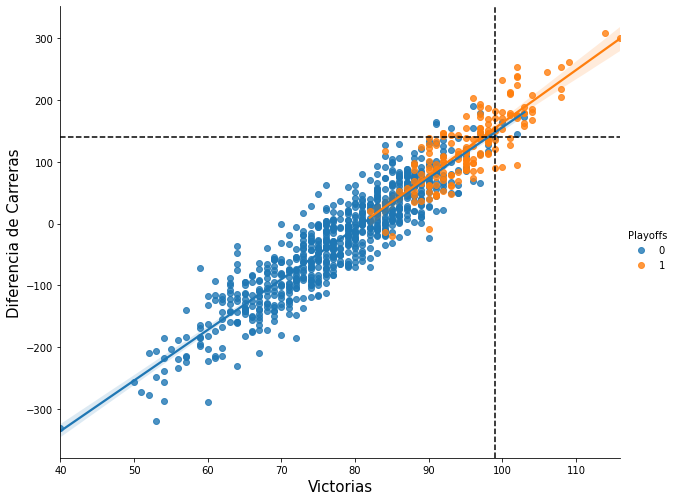

In [46]:
#Desarrolle aqui su ejercicio
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x = "W", y = "RD", fit_reg = True, hue = "Playoffs", data=df_clean,height=7, aspect=1.25)
plt.xlabel("Victorias", fontsize = 15)
plt.ylabel("Diferencia de Carreras", fontsize = 15)
plt.axvline(99, 0, 1, color = "Black", ls = '--')
plt.axhline(140, 0, 1, color = "Black", ls = '--')

plt.show()

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

import numpy as np
x = np.array(df_clean.RD)
y = np.array(df_clean.W)
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'r')
plt.grid()
plt.title("Pendiente = %s" % (slope), fontsize = 12)
plt.xlabel("Diferencia Carreras", fontsize =20)
plt.ylabel("Victorias", fontsize = 20)
plt.axhline(99, 0, 1, color = "k", ls = '--')
plt.show()


--->

Veamos un poco como se diferencian los equipos clasificados de los demas bajo este mismo analisis

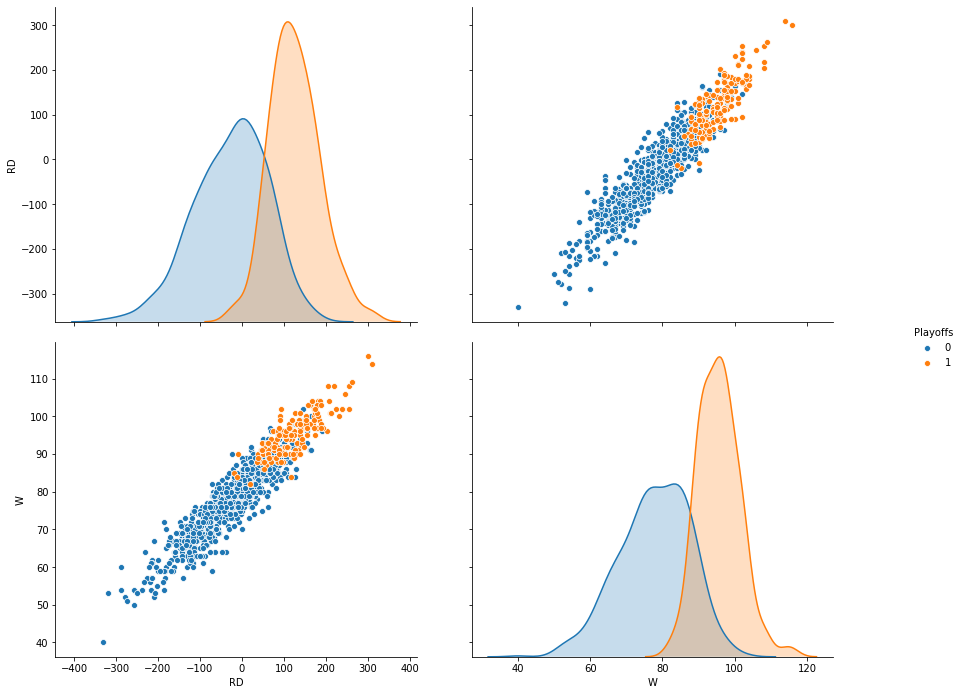

In [47]:
corrcheck = df_clean[['RD', 'W', 'Playoffs']].copy()
g = sns.pairplot(corrcheck, hue = 'Playoffs',vars=["RD", "W"])
g.fig.set_size_inches(14,10)

## Pregunta 5 ¿Son las carreras la respuesta?

Calcule la correlación entre las victorias y la diferencia de carreras RD utilizando pandas

In [51]:
#Desarrolle aqui su ejercicio
import pandas as pd

df_clean[["RD","W"]].corr()

,RD,W
RD,1.000000,0.938515
W,0.938515,1.000000


## Pregunta 6 El machine learning entra en escena

Defina la variable a predecir $y$ como las victorias ("Wins") y la matriz de características $X$ con las caracteristicas que considere relevantes para predecir las victorias. 


In [68]:
#Desarrolle aqui su ejercicio

# RS — Carreras Anotadas
# RA — Carreras permitidas
# W — Victorias
# OBP — Porcentaje en Base
# SLG — Porcentaje slugging (productividad de bateo)
# BA — Promedio de bateo
# RD — Diferencia entre Carreras Anotadas y Carreras permitidas

X = df_moneyball[['RA', 'OBP',	'SLG',	'BA',	'G',	'RD']]
y = df_moneyball['W']

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:


X= df_clean[['RS', 'RA', 'OBP', 'SLG', 'BA', 'RD']]
y = df_clean['W']


--->

## Pregunta 7 

Utilizando los conceptos aprendidos implemente una regresiín lineal multiple con la matriz X y la variable objetivo definida en el ejercicio anterior. Recuerde separar la data en conjunto de entrenamiento y prueba. 

In [69]:
#Desarrolle aqui su ejercicio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)
#X_train.head()

linearM  = LinearRegression(normalize=True)
linearM.fit(X_train,y_train)
print('R2 =',linearM.score(X_test,y_test))
print('wi =',linearM.coef_)
print('w0 =',linearM.intercept_)

R2 = 0.86978601587769
wi = [-8.39825421e-03  3.66271463e+01  1.32040607e+01 -1.62307981e+01
  4.66378998e-01  9.63053212e-02]
w0 = -1.5244784830401272


Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

print('Modelo de victorias')
print('Intercepto Modelo Lineal: {}'.format(linreg.intercept_))
print('Coeficientes Modelo Lineal:\n{}'.format(linreg.coef_))
print('R-cuadrado (entrenamiento): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-cuadrado (prueba): {:.3f}'.format(linreg.score(X_test, y_test)))

--->

## Pregunta 8

Utilizando los conceptos aprendidos implemente una regresión Ridge con la matriz X y la variable objetivo definida en el ejercicio anterior. Recuerde separar la data en conjunto de entrenamiento y prueba. 

In [70]:
#Desarrolle aqui su ejercicio
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

#modelo OLS
print("Modelo OLS")
linearM  = LinearRegression(normalize=True)
linearM.fit(X_train,y_train)
print('R2 OLS =',linearM.score(X_test,y_test))
print('wi OLS =',linearM.coef_)
print('w0 OLS =',linearM.intercept_)

print("--------------------------------")
#Modelo Ridge
print("Modelo Ridge")
ridge  = Ridge(alpha=1,normalize=True)
ridge.fit(X_train,y_train)
print('R2 Ridge =',ridge.score(X_test,y_test))
print('wi Ridge =',ridge.coef_)
print('w0 Ridge =',ridge.intercept_)

Modelo OLS
R2 OLS = 0.86978601587769
wi OLS = [-8.39825421e-03  3.66271463e+01  1.32040607e+01 -1.62307981e+01
  4.66378998e-01  9.63053212e-02]
w0 OLS = -1.5244784830401272
--------------------------------
Modelo Ridge
R2 Ridge = 0.7509008491990959
wi Ridge = [-2.75820472e-02  9.10185279e+01  3.42084298e+01  6.90598603e+01
  5.94648532e-01  3.73776535e-02]
w0 Ridge = -56.75555114595947


Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

from sklearn.linear_model import Ridge


linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Modelo de victorias')
print('Intercepto Regresión Ridge: {}'.format(linridge.intercept_))
print('Coeficientes Regresión Ridge:\n{}'.format(linridge.coef_))
print('R-cuadrado (entrenamiento): {:.3f}'.format(linridge.score(X_train, y_train)))
print('R-cuadrado (prueba): {:.3f}'.format(linridge.score(X_test, y_test)))
print('Numero de caracteristicas con peso no nulo: {}'.format(np.sum(linridge.coef_ != 0)))


--->

## Pregunta 9

Implementar la regresión de Ridge para los siguientes valores del parámetro de regularización $\alpha=[0, 1, 10, 20, 50, 100, 1000]$ imprimiendo los valores de R-cuadrado tanto del test como de la prueba

In [73]:
#Desarrolle aqui el ejercicio

alpha=[0,1,10,20,50,100,1000]

for x in alpha:
#Modelo Ridge alpha = x
  print("Modelo Ridge alpha = " + str(x))
  ridge  = Ridge(alpha=x,normalize=True)
  ridge.fit(X_train,y_train)
  print('R2 Ridge test=',ridge.score(X_test,y_test))
  print('R2 Ridge train=',ridge.score(X_train,y_train))


Modelo Ridge alpha = 0
R2 Ridge test= 0.8697860158776893
R2 Ridge train= 0.8836004437116216
Modelo Ridge alpha = 1
R2 Ridge test= 0.7509008491990959
R2 Ridge train= 0.7632792264613624
Modelo Ridge alpha = 10
R2 Ridge test= 0.2524566615607786
R2 Ridge train= 0.2608571421942574
Modelo Ridge alpha = 20
R2 Ridge test= 0.1428932778037174
R2 Ridge train= 0.14925631847230736
Modelo Ridge alpha = 50
R2 Ridge test= 0.060715734672807
R2 Ridge train= 0.06532858281974274
Modelo Ridge alpha = 100
R2 Ridge test= 0.029813489818347864
R2 Ridge train= 0.033720877686386985
Modelo Ridge alpha = 1000
R2 Ridge test= 0.0002638701520535358
R2 Ridge train= 0.003473089911329441


Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:


print('Ridge Regression: efectos del parametro de regularización alpha\n')
for alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = alpha).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\n, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'.format(alpha, r2_train, r2_test))


--->

## Pregunta 10

Realizar los mismos calculos de las preguntas 8 y 9 pero esta vez para la regresión de Lasso

In [ ]:
#Desarrolle aqui el ejercicio

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Autos dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

print('Lasso regression: efectos del parametro de regularización')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train, y_train)
    r2_train = linlasso.score(X_train, y_train)
    r2_test = linlasso.score(X_test, y_test)
    
--->

## Pregunta 11
Utilizando el metodo predict, calcule el numero de victorias que su mejor modelo propone para las cifras reales del Athletics de Oakland (Tema='ATL') real de 2002. Ejemplo: para un modelo de 6 variables el metodo predict funciona asi:

+ linridge.predict([[c1,c2,c3,c4,c5,c6]])

In [ ]:
#Desarrolle aqui su ejercicio


<p><a name="metrics"></a></p>

# 5.0. Métricas

[[Contenidos]](#contents)

En la sesión anterior estudiamos un modelo de regresión simple, por medio del cual se hace una predicción calculando una suma ponderada de las características de entrada, más una constante llamada término de sesgo (también llamado intercepto).

$$y=w_0+w_1x_1+w_2x_2+...+w_nx_n$$

Primero necesitamos de una medida de qué tan bien (o mal) el modelo se ajusta a los datos de entrenamiento. Esta medida de evaluación (función de costo) es el error calculado entre la recta generada $\hat{y}$ (o el hiperplano) a los puntos reales. El entrenamiento del modelo será entonces encontrar los valores de $w_i$ que minimicen dicha función de costo. Entre las métricas más populares encontramos:

* Error medio absoluto (MAE):  es una puntuación lineal, lo que significa que todas las diferencias individuales se ponderan por igual en el promedio. No es tan sensible a los valores atípicos como el error cuadrático medio.

$$MAE = \frac{1}{m}\sum_{i=1}^{m}|\hat{y}_i -y_i|$$

* Error cuadrático medio (MSE): Cuanto mayor sea este valor, peor es el modelo. Nunca es negativo, ya que estamos cuadrando los errores de predicción individuales antes de sumarlos, pero sería cero para un modelo perfecto. Útil si tenemos valores inesperados que nos deberían interesar. Muy alto o bajo valor que debemos prestar atención. Sin embargo, si hacemos una predicción muy mala, la cuadratura empeorará aún más el error y puede sesgar la métrica para sobreestimar el desajuste  del modelo. 

$$MSE=\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}_i -y_i\right)^2$$

* Raíz del error cuadrático medio (RMSE): Minimizar el RMSE también disminuye el MSE. Así, desplazarse a lo largo del gradiente del MSE es equivalente a desplazarse a lo largo del gradiente RMSE, pero con una tasa de cambio diferente. Entonces, aunque RMSE y MSE son realmente similares en términos de puntuación de modelos, pueden no ser intercambiables de forma inmediata para los métodos basados ​​en gradientes.

$$RMSE=\sqrt{\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}({\bf x})_i -y_i\right)^2}$$

Estas métricas las podemos obtener del módulo [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn. Apliquémoslas al siguiente modelo lineal simple:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

#separemos nuestros datos en características y etiquetas
X = df['engine-size'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#seleccionamos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

#entrenamos el modelo
linear  = LinearRegression(normalize=True)
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Obtengamos ahora los datos predichos por el modelo y calculemos las métricas

In [ ]:
y_pred = linear.predict(X_test)

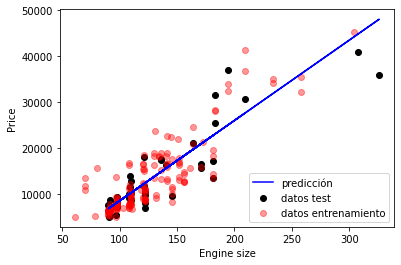

In [ ]:
plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred, color='blue',label=r'predicción')
plt.legend(loc='lower right')
plt.xlabel(r'Engine size')
plt.ylabel(r'Price')
plt.show()

In [ ]:
print("Metricas de nuestro modelo")
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Metricas de nuestro modelo
MAE:  3017.348816752345
MSE:  18576671.47536118
RMSE:  4310.066295935734


Y calculemos el  $R^2$

In [ ]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.7735450111026794


Comprobemos además si los errores se distribuyen según una distribución normal, lo que nos da una prueba de la validez de nuestro modelo.

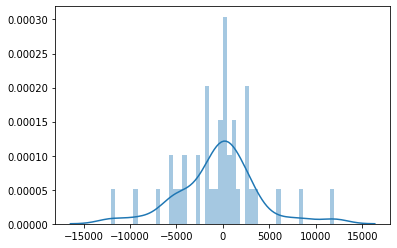

In [ ]:
sns.distplot((y_test - y_pred), bins = 50)
plt.show()

Una vez que hemos entrenado el modelo de regresión lineal las predicciones se obtienen rápidamente. 


Algunos aspectos a considerar:

+ La complejidad computacional es lineal con respecto a la cantidad de instancias y características sobre las que desea hacer predicciones. En otras palabras, hacer predicciones con el doble de instancias (o el doble de características) tomará aproximadamente el doble de tiempo de computo.

+  Existen diferentes formas de entrenar un modelo de regresión lineal, más adecuado para casos en los que hay una gran cantidad de características o demasiadas instancias de entrenamiento para que quepan en memoria.





# 6.0. Gradiente descendente

Existen formas diferentes de entrenar un modelo de regresión lineal, más adecuado para casos en los que, como mencionamos, hay una gran cantidad de características o demasiadas instancias de entrenamiento. Un algoritmo con estas características es el del gradiente descendente estocástico (SGD).
Recordemos que los gradientes tienen la forma:

$$\triangledown f(x,y)=\begin{bmatrix}
\frac{\partial f}{\partial x}\\ 
\\ 
\frac{\partial f}{\partial y}
\end{bmatrix}$$

La idea general del algoritmo de gradiente descendente es ajustar los parámetros $w_i$ de forma iterativa para minimizar la función de costo. Básicamente, este algoritmo mide el gradiente local de la función de costo con respecto a los parámetros $w_i$, y va en la dirección del gradiente descendente. Una vez que el gradiente es cero se ha alcanzado un mínimo.

<img height="300px" src="https://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png" alt="Drawing" style="width: 200px;"/>

Un parámetro importante es el tamaño de los pasos, determinado por el hiperparámetro $\eta$, conocido como *tasa de aprendizaje*. Si este es muy pequeño, el algoritmo tomará mucho tiempo en converger al mínimo. Por el contrario si este es muy grande, se corre el peligro de alejarse mucho más del mínimo.


<img height="240px" src="https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0407.png" alt="Drawing" style="width: 400px;"/>



Concretamente, el SGD selecciona una instancia aleatoria en el conjunto de entrenamiento en cada paso y calcula los gradientes basado solo en esa instancia. Esto es lo que hace que el algoritmo sea mucho más rápido, ya que tiene muy pocos datos para manipular en cada iteración. 

La clase `LinearRegression` de sklearn que hemos utilizado no utiliza este algoritmo. Para implementar una regresión lineal usando SGD con Scikit-Learn, se puede usar la clase `SGDRegressor`, que por defecto optimiza la función de costo MSE. Vamos a generar algunos datos de aspecto lineal para probar probar el modelo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

sgd_reg = SGDRegressor(max_iter=2000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=2000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
w0, w1 = sgd_reg.intercept_, sgd_reg.coef_

print(w0,w1)

[3.97022071] [2.98318796]


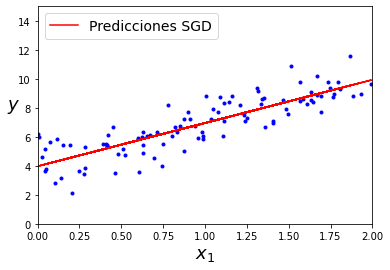

In [ ]:
#Grafiquemos la predicción del SGD
plt.plot(X, y, "b.")
plt.plot(X, [w0 + w1 * x for x in X], "r-", label="Predicciones SGD")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

<p><a name="regpol"></a></p>

# 7.0. Regresión polinómica

[[Contenidos]](#contents)

**Regresión Polinómica**

Hasta ahora nos hemos centrado en la creación de modelos lineales simples y multivariados en donde la relación entre la/las variable/variables predictora/predictoras y la variable blanco corrsponde a una relación lineal. 

No obstante, en algunas ocasiones las tendencias de los datos presentan un comportamiento curvo. En estos caso debemos buscar otro modelo para representar los datos, como es el método de **regresión polinómica**. Dentro de la regreción polinómica, tenemos varias tipos de regresiones dependiendo del grado del polinómio que usemos:

* Cuadrática: Si el polinomio que usamos es grado dos.
* Cúbica: Si el polinomio que usamos es grado tres.
* etc

Podemos llamar a todos estos casos regresiones polinómicas, ya que la relación entre la variable independiente $x$ y la variable dependiente  $y$ se modela mediante un polinomio de grado n en la variable $x$:

\begin{equation}
\hat{y}=w_0x^0+w_1x^1+w_2x^2\cdots w_nx^x = \sum_{i=0}^nw_ix^i
\end{equation}

En donde los $w$'s representan los parámetros del ajuste o la regresión 

**¿Cómo podemos abordar una regresión polinómica?**

Existe un "truco" que nos permite convertir una regresión polinómica en una regresión lineal múltiple. Si definimos:

* $x_1=x$
* $x_2=x^2$
* $x_3=x^3$
* $\cdot$
* $\cdot$
* $\cdot$
* $x_n=x^n$

podemos tratar el problema como una regresión lineal múltiple de la forma

\begin{equation}
\hat{y}=w_0x_0+w_1x_1+w_2x_2\cdots w_nx_x = \sum_{i=0}^nw_ix_i
\end{equation}

Por ende, la **regresión polinómica se considera un caso especial de la regresión lineal múltiple**, de tal forma que se pueden usar los mismos mecanismos que una regresión lineal para resolver el problema del modelado de los datos.

## Pregunta 12
Es el siguiente modelo una regresión lineal?

\begin{equation}
\hat{y}=w_0x_0+w_1x_1+w_2^{2}x_2^{2}
\end{equation}

In [ ]:
#Desarrolle aqui su ejercicio



A continuación, tomaremos un conjunto de datos correspondientes a la clasificaciones de consumo de combustibles específicas de los modelos de carros y las emisiones estimadas de dióxido de carbono de nuevos vehiculos ligeros para la venta al por menor en Canada. Para mayor información puede consultar el [link](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64). La base de datos contienen características como:

- **MODELYEAR** Año del vehiculo.
- **MAKE** Marca o fabricante
- **MODEL** Modelo del vehiculo.
- **VEHICLE CLASS** Clase del vehiculo
- **ENGINE SIZE** Tamaño del motor.
- **CYLINDERS** Número de cilindros
- **TRANSMISSION** Tipo de transmisión
- **FUEL CONSUMPTION in CITY(L/100 km)** Consumo en ciudad en litros por cada 100 km.
- **FUEL CONSUMPTION in HWY (L/100 km)** Consumo en autopista en litros por cada 100 km.
- **FUEL CONSUMPTION COMB (L/100 km)** Consumo combinado en litros por cada 100 km.
- **CO2 EMISSIONS (g/km)** Emisión en gramos por kilómetros.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Lectura de los datos
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")

# Inspección visual del dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Escojamos algunas características que estén relacionadas con la emisión de dioxido de carbono. Veamos la matriz de dispersión

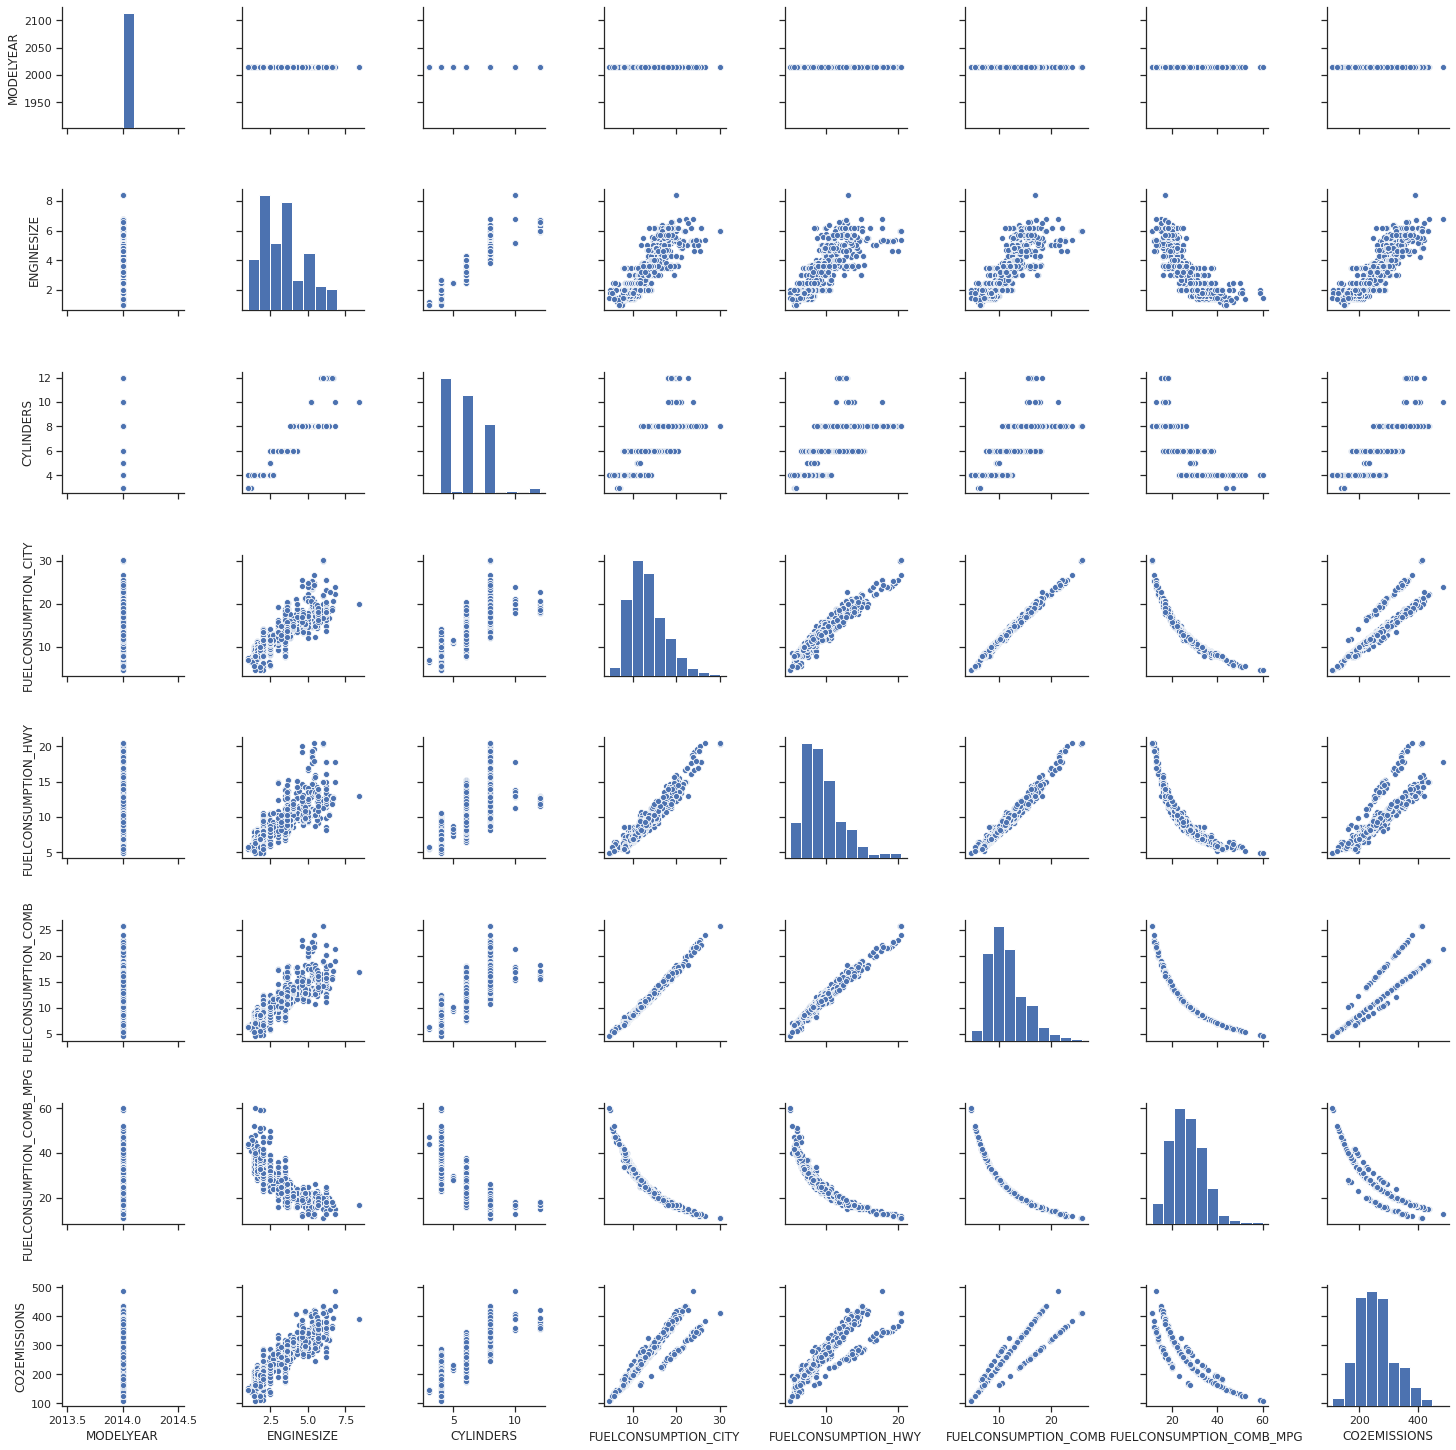

In [ ]:
#Utilizamos seaborn para analizar la matriz de dispersión
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df)

Intentemos construir un modelo, mediante un ajuste polinomial, de la emisión de dióxido de carbono en función de la característica "FUELCONSUMPTION_COMB_MPG"

In [ ]:
# Escogemos nuestra variable predictora como Engine Size:
X=df['FUELCONSUMPTION_COMB_MPG'].values.reshape(-1,1)

# Escogemos nuestra variable objetivo como las emisiones de CO2:
y=df['CO2EMISSIONS'].values.reshape(-1,1)



Creemos ahora los grupos de train y test con los cuales entrenaremos y probaremos el modelo, respectivamente. Recordemos que este paso podemos hacerlo mediante la función `train_test_split` de la librería `sklearn.model_selection`:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(853, 1) (853, 1)
(214, 1) (214, 1)


## 7.1. Creación de modelos polinomicos

Intentemos crear un modelo cuadrático de la emisión de dióxido de carbono en función del tamaño del motor:

$\hat{y} = w_o + w_1 x + w_2 x^2$

En donde x reprenta la variable independiente 'FUELCONSUMPTION_COMB_MPG'. Para resolver este problema usamos la siguiente función:


__PolynomialFeatures()__ es una función de la  librería Scikit-learn, la cual emplea nuevo conjunto de características del conjunto de características original. Es decir, se generará una matriz compuesta de todas las combinaciones polinomiales de las características de grado menor o igual especificado en `degree`. 

Por ejemplo, suponiendo que el conjunto inicial solo tienen una característica, _FUELCONSUMPTION_COMB_MPG_, entonces, si especificamos `degree=2`, se generarán tres caracteristicas dadas por `degree=0`, `degree=1` y `degree=2`: 

In [ ]:
#Importamos las funciones PolynomialFeatures y LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Especificamos el grado 2 de nuestro forma polinomica
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(x_train)
train_x_poly

array([[1.000e+00, 2.800e+01, 7.840e+02],
       [1.000e+00, 2.700e+01, 7.290e+02],
       [1.000e+00, 1.700e+01, 2.890e+02],
       ...,
       [1.000e+00, 1.700e+01, 2.890e+02],
       [1.000e+00, 3.400e+01, 1.156e+03],
       [1.000e+00, 1.400e+01, 1.960e+02]])

El método **fit_transform** tomo los valores de x y crea una lista, elevando los valores en potencias enteras desde 0 hasta 2.

$
\begin{bmatrix}
    x_1\\
    x_2\\
    \vdots\\
    x_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & x_1 & x_1^2]\\
    [ 1 & x_2 & x_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & x_n & x_n^2]
\end{bmatrix}
$

A partir de este punto, podemos tratar nuestro problema como un caso de regresión lineal, de tal forma que podemos usar los mismos mecanismos que se emplean para resolver este tipo de problemas. Podemos usar, por ejemplo, la función  __LinearRegression()__ para solucionar nuestro problema:

In [ ]:
#Instanciamos un modelo de regresión Lineal
clf = LinearRegression()
train_y_ = clf.fit(train_x_poly, y_train)
# The coefficients
print ('Coeficientes: ', clf.coef_)
#print ('Intercepto: ',clf.intercept_)

Coeficientes:  [[  0.         -15.09886556   0.12927416]]


En la celda anterior, __Coefficient__ e __Intercept__ corresponden a los parámetros del ajuste de la linea curva. 

Teniendo en cuenta que estamos tratando con una regresión lineal múltiple con 3 parámetros, los cuales representan la intersección y los coeficientes del hiperplano, sklearn los calcula a partir del nuevo conjunto de características. Veamos como luce el ajuste realizado sobre los datos de "COEMISSION" vs "FUELCONSUMPTION_COMB_MPG":

Text(0, 0.5, 'Emission')

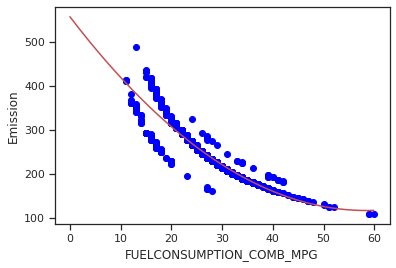

In [ ]:
plt.scatter(X, y,  color='blue')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*XX*XX
plt.plot(XX, yy, '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")

## 7.2. Evaluación

Con las métricas estudiadas previamente veamos como se desempeñan los distintos modelos  tratando de predecir las emisiones a partir de la variable FUELCONSUMPTION_COMB_MPG

In [ ]:
#con la regresion lineal
linear = LinearRegression()
linear.fit(x_train,y_train)

y_pred = linear.predict(x_test)

print("Resultados Regresión Lineal")
print('MAE: %.3f '% metrics.mean_absolute_error(y_test, y_pred))
print('MSE: %.3f'% metrics.mean_squared_error(y_test, y_pred))
print('RMSE: %.3f'% np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: %.3f'% metrics.r2_score(y_test, y_pred))

Resultados Regresión Lineal
MAE: 17.371 
MSE: 709.475
RMSE: 26.636
R2: 0.825


In [ ]:
#con la regresion polinómica
from sklearn import metrics
test_x_poly = poly.fit_transform(x_test)
test_y_ = clf.predict(test_x_poly)

print('MAE: %.3f' % metrics.mean_absolute_error(test_y_, y_test))
print('MSE: %.3f' % metrics.mean_squared_error(test_y_, y_test))
print('RMSE: %.3f' % np.sqrt(metrics.mean_squared_error(test_y_, y_test)))
print('R2: %.3f'% metrics.r2_score(test_y_, y_test))

MAE: 14.206
MSE: 594.293
RMSE: 24.378
R2: 0.831


## Pregunta 13:

Relice un ajuste a un polinomio de grado tres en donde aplique cada uno de los pasos mostrados la regresión polinómica anterior, y evalue si obtiene un mejor modelo. Tambien grafique el ajuste usando *plt.scatter()* 

In [ ]:
#Desarrolle aqui su ejercicio


Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(x_train)

clf3 = LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, y_train)

#coeficientes
print ('Coeficientes: ', clf3.coef_)
print ('Intercepto: ',clf3.intercept_)

#Grafica
plt.scatter(X, y, color="b")
XX = np.arange(0.0, 60.0, 0.1)
Y = clf3.intercept_ + clf3.coef_[0][1]*XX + clf3.coef_[0][2]*XX**2 + clf3.coef_[0][3]*XX**3
plt.plot(XX,Y,"r-" )
plt.show()

test_x_poly3 = poly3.fit_transform(x_test)
test_y3_ = clf3.predict(test_x_poly3)

print('MAE: %.3f ' % metrics.mean_absolute_error(y_test, test_y3_))
print('MSE: %.3f' % metrics.mean_squared_error(y_test, test_y3_))
print('RMSE: %.3f' % np.sqrt(metrics.mean_squared_error(y_test, test_y3_)))
print('R2: %.3f'% metrics.r2_score(y_test, test_y3_))

--->

## 7.3. Ejemplo :

Intentemos encontrar un modelo  para representar el salario a partir de la edad de un grupo de trabajadores de los Estados Unidos:

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Wage.csv")
df.head(10)

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
5,376662,2008,54,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744
6,450601,2009,44,1. Male,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538
7,377954,2008,30,1. Male,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849
8,228963,2006,41,1. Male,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359
9,81404,2004,52,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.857332,128.680488


### 7.3.1 Gráfica del dataset ###

Veamos como luce el dataset:

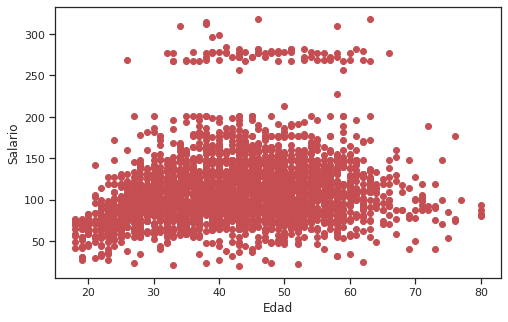

In [ ]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["age"].values, df["wage"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Salario')
plt.xlabel('Edad')
plt.show()

Esta grafica sugiere un comportamiento no lineal entre la edad y el salario, pues parece que el salario crece con la edad hasta cierta cima para luego comenzar a descender. 

### 7.3.2 Determinación del modelo ###

De una inspección inicial, podemos determinar que una polinomica podría ser adecuada. Veamos la siguiente función polinomic de grado 4:

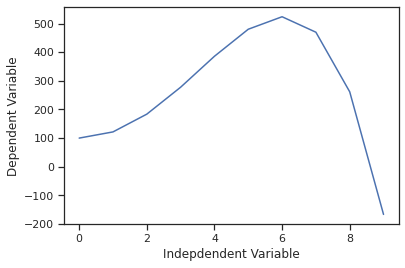

In [ ]:
#Veamos un intento artesanal de aproximar la grafica
X = np.arange(0, 10, 1)
Y = 100+X+20*X**2+X**3-0.4*X**4

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Tenemos la siguiente forma polinomica

$$ \hat{W} =\hat{\beta_{0}}+\hat{\beta_{1}}X+\hat{\beta_{2}}X^{2}+\hat{\beta_{3}}X^{3}+\hat{\beta_{4}}X^{4} $$


### Pregunta 14

Desarrolle una regresion polinomica de grado 4 para modelar Wage en función de edad, luego grafique el modelo estimado encima de la dispersion de los datos.

In [ ]:
#Desarrolle aqui su ejercicio


Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:


#Importamos las funciones PolynomialFeatures y LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Escogemos nuestra variable predictora edad:
X=df['age'].values.reshape(-1,1)

# Escogemos nuestra variable objetivo como el salario:
y=df['wage'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=20)

#Especificamos el grado 4 de nuestro forma polinomica
poly = PolynomialFeatures(degree=4)
train_x_poly = poly.fit_transform(x_train)

#Instanciamos un modelo de regresión Lineal
clf = LinearRegression()
train_y_ = clf.fit(train_x_poly, y_train)
#Coeficientes
print ('Coeficientes: ', clf.coef_)

plt.scatter(X, y,  color='blue')
XX = np.arange(0.0, 100.0, 1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*XX*XX+ clf.coef_[0][3]*XX*XX*XX++ clf.coef_[0][4]*XX*XX*XX*XX
plt.plot(XX, yy, '-r')
plt.xlabel("Edad")
plt.ylim(0, 500) 
plt.ylabel("Salario")
--->

## Pregunta 15:
Evalue la precisión del modelo creado anteriormente.

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:



# Evaluacion
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , y_test) )
--->

# 8.0 Modelos no lineales

Como bien sabemos, si los datos no presentan una tendencia lineal entre las características y las variables objetivo, debemos buscar ajustes a funciones no lineales para la construcción de modelos. Veamos algunas funciones de uso común para el ajuste de modelos y un ejemplo práctico del PIB chino.

Las regresiones no lineales representan una relación entre variabres independientes $x$'s y una variable dependiente $y$, lo que resulta en un modelado mediante una función no lieal de los datos. En principio, cualquier relación que no es lineal, puede representarce mediante un polinomio de grado $k$. Por ejemplo: 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Además, las funciones no lineales pueden tener elementos exponenciales, logarítmicos, fracciones, entre otros. Por 
ejemplo, una función de la forma:

$$ y = \log(a x^5 + b x^3 + c x + d)$$

## 8.1. Función exponencial

Una función exponencial de base c, se define como 

$Y = a + b c^X$

en donde $b\neq0$, $c > 0$ , $c\neq1$, y la X es un número real. La base, $c$, es una constante y el exponente, $X$, es una variable. Un ejemplo gráfico de la función se presenta a continuación:

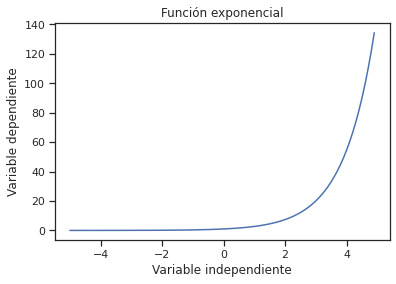

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.title('Función exponencial')
plt.show()

## 8.2. Función logarítmica

La función logarítmica es la función inversa de la función exponecial, y se representa como:

\begin{equation}
y = \log(X)
\end{equation}

Una representación gráfica de esta función se muestra a continuación:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


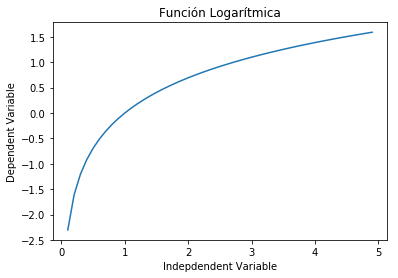

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.title('Función Logarítmica')
plt.show()

## 8.3. Función sigmoide/logística

La función sigmoide tiene la forma 

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

Y veremos, más adelante, en este curso, una aplicación en la la regresión logística. Una representación gráfica de la función se presenta a continuación:

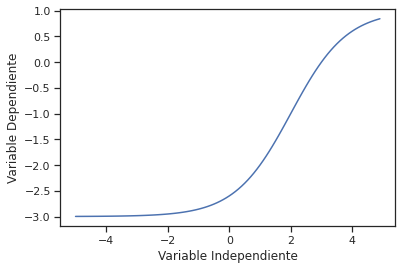

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Variable Dependiente')
plt.xlabel('Variable Independiente')
plt.show()

<p><a name="redela"></a></p>

# 9.0. Redes elásticas

[[Contenidos]](#contents)

Como vimos anteriormente, podemos generar penalizaciones a las regresiones lineales haciendo cambios en su metrica de error.

Para la regresión Ridge se penaliza con: $\alpha \sum w_i^2$ (penalidad $L_2$), mientras que para Lasso se tiene que: 
$\alpha \sum |w_i|$ (penalidad $L_1$). Cada una de ellas tenía sus pro y sus contra. Pero es posible hacer una combinación de ambos metodos.

A las regresiones que usan una combinación de ambas penalidades se les conoce como **ElasticNet** (Redes elásticas) y definimos su error como:

$\sum (Y_i- \hat Y_i)^2+\alpha \rho \sum |w_i| + \frac{\alpha(1-\rho)}{2}\sum w_i^2 $

Note que cuando $ \rho=1$ tenemos la regresión Lasso, y con $\rho=0$ tendremos la de Ridge, por tanto en las redes elásticas $0\leq \rho\leq1$.

Hemos dado un paso más en la complejización del modelo ya que ahora debemos preocuparnos por el ajuste de 2 hiperparámetros para seleccionar el mejor modelo.

Para usar las redes elásticas en sklearn debemos importar la función 'ElasticNet' del modulo de modelos lineales.

In [ ]:
from sklearn.linear_model import ElasticNet

En la implementación de sklearn tenemos los hiperparámetros 'alpha' y 'l1_ratio' ($\rho$ en nuestra ecuación), con ellos controlaremos el comportamiento del regresor.

Tenga en cuenta que para valores de *l1_ratio* $\leq0.01$ el algoritmo de sklearn no es estable si usamos el valor de $\alpha$ por defecto y se hace necesario que nosotros mísmos ajustemos el valor. 

In [ ]:
import pandas as pd
import numpy as np

#retomemos nuestro dataset de vehiculos en Canadá

df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')

df.dropna(inplace=True)

X = df['ENGINESIZE'].values.reshape(-1,1)
y = df['CO2EMISSIONS'].values

In [ ]:
#Importamos el modelo ElasticNet del paquete sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn import metrics

#seleccionamos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

#entrenamos el modelo
elastic = ElasticNet(alpha=0.01,l1_ratio=1,normalize=True)
elastic.fit(X_train,y_train)
y_pred = elastic.predict(X_test)

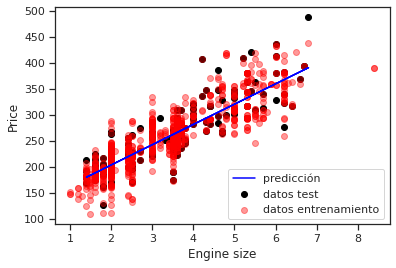

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred, color='blue',label=r'predicción')
plt.legend(loc='best')
plt.xlabel(r'Engine size')
plt.ylabel(r'Price')
plt.show()

In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', elastic.score(X_test,y_test))

MAE:  21.996655219235205
MSE:  898.3256895519332
RMSE:  29.97208183546704
R2:  0.7597831059324895


De nuevo, los hiperparámetros debemos seleccionarlos con una busqueda para determinar una buena combinación.

## Pregunta 16 

+ Usando el dataset de 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv' elimine las filas con datos faltantes, y genere variables dummy `pd.get_dummies()` para las variables categoricas.
+ Use dos ciclos **for** para iterar en lista $\alpha$=[0.01,0.1,1,10,100,1000] y la lista l1_ratio=[0.1,0.4,0.6, 0.8, 0.9,0.999] entrenando un modelo de redes elásticas con cada combinación de estos valores y evaluando el RMSE. Guarde en un array los RMSE obtenidos.
+ Grafique un heatmap con los valores obtenidos y analice. Utilice el paquete  `sns.heatmap(RMSEs/1000, xticklabels=alphas, yticklabels=l1s,annot=True )`

In [ ]:
#Desarrolle aqui su ejercicio
 

Hacer doble click **aquí** para ver la solución:

<!-- Respuesta:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn import metrics

#Cargamos el dataframe
df=pd.read_csv( 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')

#eliminamos datos nulos
df.dropna(inplace=True)

#creamos las variables dummies
df_dummies = pd.get_dummies(df)

#separamos el dataset
X = df_dummies.drop('price',axis=1)
y = df_dummies['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


#Creamos la lista de alphas, l1_ratios y el arreglo de RMESs
alphas =  [0.01,0.1,1,10,100,1000] 
l1s = [0.1,0.4,0.6,0.8,0.9,0.999]
RMSEs = []

#Recorremos los valores en los arreglos
for alpha in alphas:
  for l1 in l1s:
    elastic = ElasticNet(alpha=alpha,l1_ratio=l1,normalize=True)
    elastic.fit(X_train,y_train)
    y_pred = elastic.predict(X_test)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
     
    RMSEs.append(RMSE)
RMSEs = np.array(RMSEs)

#3
import seaborn as sns
#pasamos de un arreglo a una matriz para usarlo en el mapa de calor
RMSEs = RMSEs.reshape(len(alphas),len(l1s))
sns.heatmap(RMSEs/1000, xticklabels=alphas, yticklabels=l1s,annot=True,cmap="YlGnBu")


--->

<p><a name="svm"></a></p>

# 10.0 Máquinas de Soporte Vectorial (Support Vector Machine SVM)

[[Contenidos]](#contents)

SVM son algoritmos de Machine Learning desarrollados por  Vladimir Vapnik y su equipo en los laboratorios AT&T. Estos algoritmos sirven tanto para solucionar problemas de clasificación como de regresión. 



## 10.1. Intuición inicial

Supongamos que tenemos un dataset con dos características y  queremos clasificar con una línea recta (hiperplano en el caso de mas dimensiones) a que grupo (rojos o azules) corresponde cada uno. 

<p><img height="230px" src="https://miro.medium.com/max/300/0*9jEWNXTAao7phK-5.png"  hspace="10px" vspace="0px">
  <img height="230px" src="https://miro.medium.com/max/300/0*0o8xIA4k3gXUDCFU.png"  hspace="10px" vspace="0px"></p>



En la figura de la izquierda, podemos ver que tenemos "infinitas" rectas que sirven para clasificar los dos grupos. En SVM escogemos la recta (hiperplano) que maximiza el margen, entendiendo como el margen la distacia maxima que hay entre los puntos de las dos clases. Los puntos que están mas cerca de la frontera (línea punteada) se conocen como los vectores de soporte, estos pueden quedar sobre la línea de frontera o fuera de ella. En la figura de la derecha son datos que aparecen con el color relleno.  

## 10.2 Regresión

Los regresores basado en máquinas de soporte vectorial se suele denota como SVR (Support Vector Regressor)

###  10.2.1 SVR Lineal

Esta implementción busca  seleccionar el hiperplano regresor que mejor se ajuste a nuestro conjunto de datos de entrenamiento. Recuerde que en la regresión no contamos con clases para separar. La idea se basa en considerar una distancia margen ε, de modo que esperamos que todas las instancias se encuentren en una banda  entorno a nuestro hiperplano, es decir, que disten una cantidad menor de ε del hiperplano. A
la hora de definir el hiperplano sólo se consideran las instancias que disten más de ε de nuestro hiperplano. En este caso esas instancias serán los considerados como vectores soporte.


<p><img height="300px" src="https://www.saedsayad.com/images/SVR_2.png"  align="center" vspace="0px">



La constante C > 0 determina el equilibrio entre la regularidad de la predicción hecha por el hiperplano y la cuantía
hasta la cual toleramos desviaciones mayores que ε. Un valor muy grande de la constante C, en el caso límite (C → ∞)
estaríamos considerando que el conjunto está perfectamente representado por
nuestro hiperplano predictor (ξi → 0).

Por el contrario, un número demasiado pequeño
para C permitiría valores de ξi elevados, es decir, estaríamos admitiendo un número muy elevado de ejemplos mal representados.

In [ ]:
import sklearn.svm as svm  
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')

In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.shape

(1067, 13)

Hagamos un primer ajuste lineal. En la matriz de dispersión vimos que existe una relación lineal entre la emisión de CO2 y el tamaño del motor:

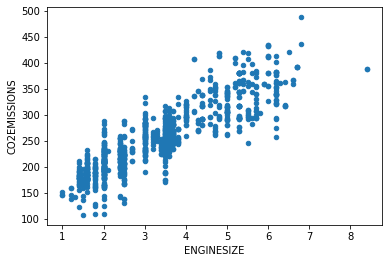

In [ ]:
df.plot(x='ENGINESIZE', y='CO2EMISSIONS',kind='scatter')

In [ ]:
#Implementamos un SVR entre la emision de CO2 y el tamaño del motor
X = df['ENGINESIZE'].values.reshape(-1,1)
y = df['CO2EMISSIONS'].values
X_train, X_test, y_train, y_test = train_test_split(X,y)

estimator=svm.LinearSVR()
estimator.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [ ]:
#Veamos los resultados obtenidos por nuestra implementación
print('R2-train: ', estimator.score(X_train, y_train))
print('R2-test: ', estimator.score(X_test, y_test))

R2-train:  0.7430874298705934
R2-test:  0.7586730667588661


In [ ]:
y_pred = estimator.predict(X_test)

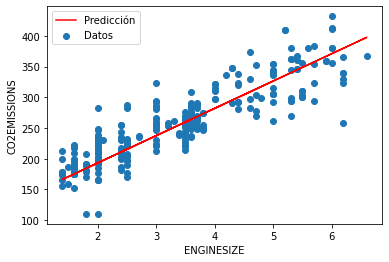

In [ ]:
plt.scatter(X_test,y_test, label='Datos')
plt.plot(X_test,y_pred, color='r', label='Predicción')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()

Con SVR se pueden hacer regresiones con multiples variables explicativas

In [ ]:
#Generamos nuestra matriz X con las variables explicativas
X = df[['ENGINESIZE','FUELCONSUMPTION_CITY','CYLINDERS']]
y = df['CO2EMISSIONS'].values
X_train, X_test, y_train, y_test = train_test_split(X,y)

estimator=svm.LinearSVR()
estimator.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [ ]:
print('R2_train: ', estimator.score(X_train, y_train))
print('R2_test: ', estimator.score(X_test, y_test))

R2_train:  0.7610075670554214
R2_test:  0.6430290465554644


In [ ]:
y_pred=estimator.predict(X_test)

Cuando el número de caracteríticas es mayor a dos y no se puede visualizar el resultado de la predicción, podemos graficar los resultados de los datos de prueba con los obtenidos a partir de la predicción. La interpretación de esta gráfica se puede entender como que una buena predicción se da para aquellos que se encuentren cerca de un línea con pendiente 1.

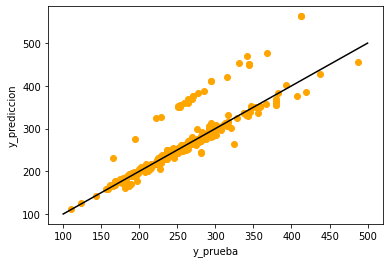

In [ ]:
plt.scatter(y_test,y_pred,color='orange')

plt.plot(np.arange(100,600,100),np.arange(100,600,100), 'k')
plt.xlabel('y_prueba')
plt.ylabel('y_prediccion')
plt.show()

### 10.2.2 SVR con kernel

Para el caso en el que la función que se desea ajustar no puede ser ajustada con una recta, el método que se utiliza es mapear los puntos a una mayor dimensionalidad en la que si se pueda hacer el ajuste lineal y luego la solución dada se mapea de regreso al espacio original. 


<p><img height="300px" src="https://www.saedsayad.com/images/SVR_5.png"  align="center" vspace="0px">



La posibles funciones de Kernel integrados en scikitlearn son: 'linear', 'poly', 'rbf', 'sigmoid'

Analicemos el caso de dos variables que es posible ver que no tienen una dependencia lineal, como FUELCONSUMPTION_COMB_MPG, FUELCONSUMPTION_CITY. Observe los resultados que se obtienen usando diferentes kernel.

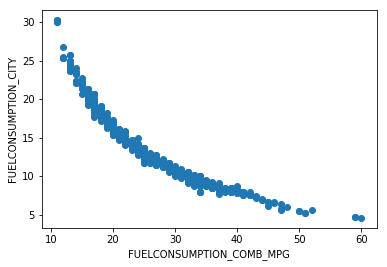

In [ ]:
plt.scatter(df['FUELCONSUMPTION_COMB_MPG'], df['FUELCONSUMPTION_CITY'])
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('FUELCONSUMPTION_CITY')
plt.show()

### Kernel lineal

In [ ]:
X = df['FUELCONSUMPTION_COMB_MPG'].values.reshape(-1,1)
y = df['FUELCONSUMPTION_CITY'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

estimator=svm.SVR(kernel='linear', gamma='auto')
estimator.fit(X_train, y_train)



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = estimator.predict(X_test)

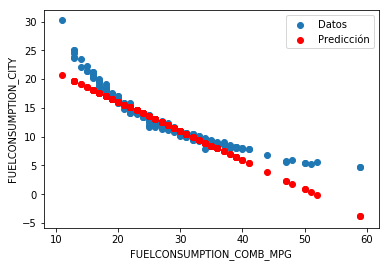

In [ ]:
plt.scatter(X_test,y_test, label='Datos')
plt.scatter(X_test,y_pred, color='r', label='Predicción')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('FUELCONSUMPTION_CITY')
plt.legend()
plt.show()

In [ ]:
print('R2_train: ', estimator.score(X_train, y_train))
print('R2_test:', estimator.score(X_test, y_test))

score_train: 0.8698299520136046
score_test: 0.8364795427307106


### Kernel rbf (radial basis function)

In [ ]:
X = df['FUELCONSUMPTION_COMB_MPG'].values.reshape(-1,1)
y = df['FUELCONSUMPTION_CITY'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

estimator=svm.SVR(kernel='rbf', gamma='auto')
estimator.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = estimator.predict(X_test)

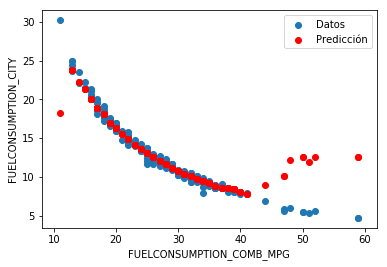

In [ ]:
plt.scatter(X_test,y_test, label='Datos')
plt.scatter(X_test,y_pred, color='r', label='Predicción')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('FUELCONSUMPTION_CITY')
plt.legend()
plt.show()

In [ ]:
print('R2_train:', estimator.score(X_train, y_train))
print('R2_test:', estimator.score(X_test, y_test))

R2_train: 0.9416935919033156
R2_test: 0.8727758239848733


## Pregunta 17 

El siguiente dataframe contiene información de horas de estudio y calificaciones obtenidas por un conjunto de estudiantes. Utilice una SVR con kernel rbf para estimar una curva no lineal de la relación existente entre las horas de estudio y las calificaciones obtenidas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv')
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values
y = np.array(y).reshape(-1,1)


#Vamos a escalar las notas y las horas de estudio con el metodo Standard Scaler
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))
print("Dataset Original")
dataset.head(5)

Dataset Original


,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


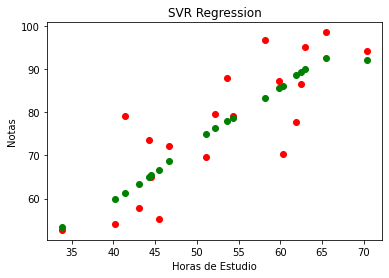

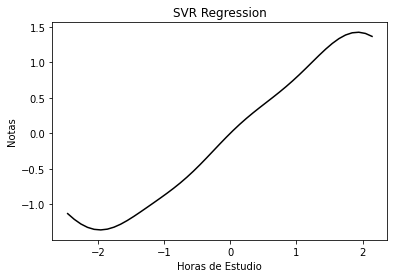

In [ ]:
#Desarrolle aqui su ejercicio



Hacer doble click **aquí** para ver la solución:

<!-- Respuesta:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
y_pred

df = pd.DataFrame({'Valores Reales':sc_y.inverse_transform(y_test.reshape(-1)), 'Valores Estimados':y_pred})
df

# Visualicemos los resultados del SVR
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test.reshape(-1)), color = 'red')
plt.scatter(sc_X.inverse_transform(X_test), y_pred, color = 'green')
plt.title('SVR Regression')
plt.xlabel('Horas de Estudio')
plt.ylabel('Notas')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('SVR Regression')
plt.xlabel('Horas de Estudio')
plt.ylabel('Notas')
plt.show()



--->

# 11.0 Selección de Modelos:
<p><a name="msel"></a></p>

[[Contenidos]](#contents)

En las secciones anteriores hemos visto la receta básica de cómo aplicar un modelo de aprendizaje supervisado en ML.

* Escoger una clase de modelo
* Escoger los hiperparámetros del modelo
* Ajustar el modelo a los datos de entrenamiento
* Usar el modelo para predecir etiquetas para nuevos datos

La elección del modelo y de los hiperparámetros es tal vez la parte más importante para darle un uso efectivo a estas herramientas y técnicas. Para tomar una decisión acertada respecto a qué modelo e hiperparámetros elegir, necesitamos una forma de validar que estos se ajusten bien a los datos.


## 11.1 Validación del modelo
<p><a name="mod_val"></a></p>

[[Contenidos]](#contents)

Después de elegir un modelo y sus hiperparámetros, podemos estimar qué tan efectivo es este al aplicarlo a algunos de los datos de entrenamiento y comparar la predicción con el valor conocido. Podemos tener una mejor idea del rendimiento de un modelo haciendo lo siguiente: Extraemos un subconjunto de los datos de entrenamiento y luego usamos este subconjunto para verificar el rendimiento del modelo. Una desventaja de usar este método para la validación del modelo es que hemos perdido una parte de nuestros datos en el entrenamiento del modelo.

Una forma de resolver esto es utilizar lo que se conoce como *validación cruzada* (VC): hacer una secuencia de ajustes donde cada subconjunto de datos se use como un conjunto de entrenamiento y como un conjunto de validación. La siguiente figura ilustra el proceso

![picture](https://www.analyticslane.com/wp-content/uploads/2018/07/validacion_cruzada.jpeg)

Dividimos los datos en tres grupos, y usamos cada uno de ellos para evaluar el ajuste del modelo en los otros 2/3 de los datos. Como salida tendremos tres puntajes de desempeño del modelo, que podríamos combinar (por ejemplo, tomando la media) para obtener una mejor medición del rendimiento del modelo global. Podemos usar el módulo `cross_val_score` de Scikit-Learn para implementar esta estrategia:

In [ ]:
#Importamos los datos de diabetes de scikit_learn
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X, y = load_diabetes(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

modelo = LinearRegression(normalize = True)

puntajes = cross_val_score(modelo, X, y, scoring = "r2", cv = 3)
puntajes

array([0.46930578, 0.48724994, 0.50955259])

La repetición de la validación en diferentes subconjuntos de datos nos da una idea aún mejor del rendimiento del algoritmo. El esquema que acabamos de ver, que se implementa por defecto, se conoce como k-fold VC.

## 11.2. Trade-Off  del sesgo/varianza
<p><a name="bias_var"></a></p>

[[Contenidos]](#contents)

Fundamentalmente, la cuestión del "mejor modelo" se trata de encontrar un punto óptimo en el equilibrio entre sesgo y varianza. (El sesgo es la incapacidad que tiene el modelo en ajustar los datos). La siguiente figura presenta dos ajustes de regresión al mismo conjunto de datos.

![picture](https://miro.medium.com/max/544/1*Y-yJiR0FzMgchPA-Fm5c1Q.jpeg)




![picture](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.03-bias-variance.png?raw=true)


Está claro que ninguno de estos modelos se ajusta particularmente bien a los datos, pero fallan de diferentes maneras:

El modelo de la izquierda intenta ajustar una línea recta a través de los datos. Debido a que los datos son intrínsecamente más complicados que una línea recta, el modelo de línea recta nunca podrá describir bien este conjunto de datos. Decimos entonces que el modelo tiene un sesgo alto. 

El modelo de la derecha ajusta los datos mediante un polinomio de grado superior. El ajuste del modelo tiene suficiente flexibilidad para explicar casi perfectamente las características finas en los datos. Decimos entonces que el modelo tiene un sesgo bajo.

Consideremos ahora también los datos de prueba

![picture](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.03-bias-variance-2.png?raw=true)

Aunque el modelo de la derecha se ajustaba mucho mejor a los datos de entrenamiento, tiene un rendimiento pésimo sobre los datos de prueba.

Decimos entonces que este modelo tiene una alta varianza. Se dice que el modelo *sobreajusta* (overfit) los datos. 
 
Para el caso del modelo de la izquierda, el rendimiento con ambos conjuntos es muy similar, por lo que tiene una baja varianza. sin embargo, por su naturaleza lineal, como mencionamos, nunca podrá ajustar los datos de manera correcta, por lo que decimos que el modelo *subajusta*  los datos.




Algunos hechos estilizados en la modelación:

* El puntaje de entrenamiento siempre es más alto que el puntaje de prueba. 
* Para una complejidad de modelo muy baja (un modelo con alto sesgo), los datos de entrenamiento no son adecuados, lo que significa que el modelo es un mal predictor tanto para los datos de entrenamiento como para cualquier dato no visto previamente.
* Para una complejidad de modelo muy alta (un modelo con alta varianza), los datos de entrenamiento están sobreajustados, lo que significa que el modelo predice muy bien los datos de entrenamiento, pero falla para cualquier dato no visto previamente.


## 11.3 Curvas de validación

<p><a name="val_cur"></a></p>

[[Contenidos]](#contents)

Veamos un ejemplo de uso de validación cruzada para calcular la curva de validación para un modelo de regresión polinomial. Utilizaremos un *pipeline* que contenga la operación de preprocesamiento polinomial (`PolynomialFeatures`) y la regresión lineal (`LinearRegression`)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

Generemos unos datos para ajustar el modelo

In [ ]:
import numpy as np

def datos(N, err=1.0, rseed=1):
    # generar datos de forma aleatoria
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = datos(40)

Ahora podemos visualizar nuestros datos, junto con ajustes polinómicos de varios grados.

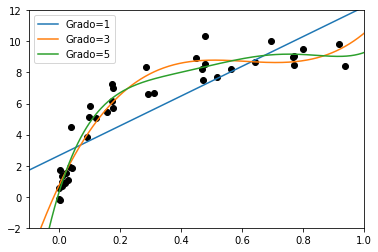

In [ ]:
import matplotlib.pyplot as plt

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='Grado={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

Lo que controla la complejidad del modelo en este caso es el grado del polinomio. ¿qué grado de polinomio proporciona una compensación adecuada entre el sesgo (subajuste) y la varianza (sobreajuste)?

Podemos visualizar la curva de validación para este modelo y datos particulares; Esto se puede hacer directamente usando la función validation_curve provista por Scikit-Learn. Dado un modelo, datos, nombre de parámetro y un rango para explorar, esta función calculará automáticamente tanto el puntaje de entrenamiento como el puntaje de validación en todo el rango

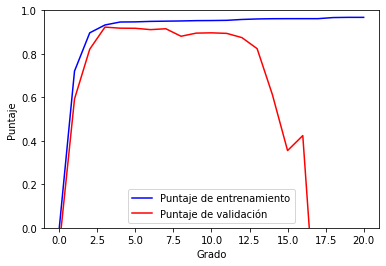

In [ ]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='Puntaje de entrenamiento')
plt.plot(degree, np.median(val_score, 1), color='red', label='Puntaje de validación')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Grado')
plt.ylabel('Puntaje');

Esto muestra con precisión el comportamiento cualitativo que esperamos: el puntaje de entrenamiento es en todas partes más alto que el puntaje de validación; el puntaje de entrenamiento mejora monotónicamente con una mayor complejidad del modelo; y la puntuación de validación alcanza un máximo antes de caerse a medida que el modelo se sobreajusta.

A partir de la curva de validación, podemos deducir que el equilibrio óptimo entre sesgo y varianza se encuentra para un polinomio de tercer orden:

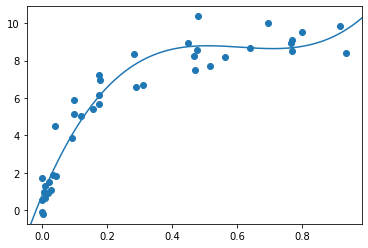

In [ ]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

## 11.4 Curvas de aprendizaje
<p><a name="lea_cur"></a></p>

[[Contenidos]](#contents)

Un aspecto importante de la complejidad del modelo es que el modelo óptimo generalmente dependerá del tamaño de los datos de entrenamiento. Por ejemplo, generemos un nuevo conjunto de datos con un factor de cinco puntos más:


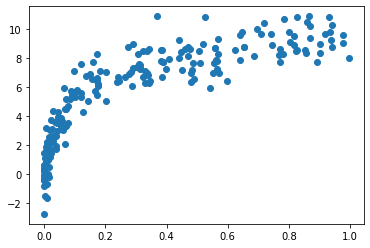

In [ ]:
X2, y2 = datos(200)
plt.scatter(X2.ravel(), y2);

Trazemos la curva de validación

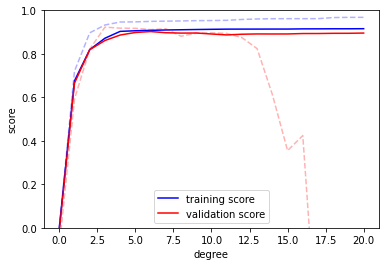

In [ ]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

Las líneas continuas muestran los nuevos resultados, mientras que las líneas discontinuas más débiles muestran los resultados del conjunto de datos anterior más pequeño. A partir de la curva de validación, es claro que el conjunto de datos más grande puede admitir un modelo mucho más complicado: el pico se da alrededor de un grado 6, pero incluso un modelo de grado 20 no está sobreajustando los datos: los puntajes de entrenamiento y de validación están muy cercanos.

 Por lo tanto, vemos que el comportamiento de la curva de validación no tiene una sino dos entradas importantes: la complejidad del modelo y el número de puntos de entrenamiento.

Scikit-Learn ofrece una práctica utilidad para calcular tales curvas de aprendizaje de sus modelos; Aquí calcularemos una curva de aprendizaje para nuestro conjunto de datos original con un modelo polinomial de segundo orden y un polinomio de noveno orden:

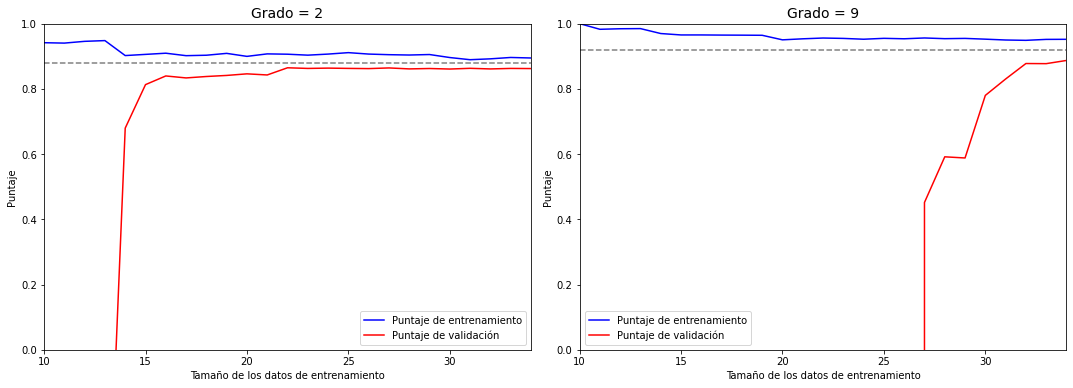

In [ ]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='Puntaje de entrenamiento')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='Puntaje de validación')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('Tamaño de los datos de entrenamiento')
    ax[i].set_ylabel('Puntaje')
    ax[i].set_title('Grado = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

Este es un diagnóstico valioso, porque nos da una descripción visual de cómo nuestro modelo responde al aumento de los datos de entrenamiento. En particular, cuando la curva de aprendizaje ya ha convergido (es decir, cuando las curvas de entrenamiento y validación ya están cercanas entre sí), ¡agregar más datos de entrenamiento no mejorará significativamente el ajuste! Esta situación se ve en el panel izquierdo, con la curva de aprendizaje para el modelo de grado 2.

Trazar una curva de aprendizaje para nuestra elección particular de modelo y conjunto de datos puede ayudarnos a tomar una decisión sobre cómo avanzar para mejorar el análisis.

## 11.5 Gridsearch para la optimización de hiper-parámetros
<p><a name="gridsearch"></a></p>

[[Contenidos]](#contents)

Un paso fundamental en cualquier modelado es el ajuste de los hiper-parámetros para generar un modelo cuya compenzación sesgo/varianza sea optima.

La idea básica es, como se hizo en la sesión pasada, explorar un amplio espacio de hiper-parámetros haciendo combinaciones posibles de ellos y usando alguna metrica escoger el mejor posible.

En scikit-learn nos es posible hacerlo de dos formas:



*   Haciendo un barrido completo de las combinaciones de hiper-parámetros (GridSearchCV)
*   Haciendo un barrido aleatorio de las combinaciones de hiper-parámetros (RandomizedSearchCV)

El primero es útil si deseamos tener un conocimiento mejor de nuestro espacio de hiper-parámetros, pero no es aconsejable si son demasiadas combinaciones o si nuestro algoritmo es lento en entrenamiento.
Ambos métodos los encontrarémos en 'sklearn.model_selection'





In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.svm import SVR

df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')
X = df['ENGINESIZE'].values.reshape(-1,1)
y = df['CO2EMISSIONS'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=3)


# creamos los diccionarios sobre los que exploraremos
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


#para ver las posibles metricas: https://scikit-learn.org/stable/modules/model_evaluation.html

clf = GridSearchCV(SVR(), tuned_parameters, cv=5,scoring= 'r2')
clf.fit(X_train, y_train)

print("Mejor conjunto de parámetros:")
print()
print(clf.best_params_)
print()
print("Media y desviación:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))


Mejor conjunto de parámetros:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Media y desviación:

0.037 (+/-0.029) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
-0.011 (+/-0.032) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.396 (+/-0.041) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.038 (+/-0.029) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.746 (+/-0.036) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.398 (+/-0.042) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.762 (+/-0.035) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.746 (+/-0.035) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.761 (+/-0.035) for {'C': 1, 'kernel': 'linear'}
0.762 (+/-0.035) for {'C': 10, 'kernel': 'linear'}
0.762 (+/-0.035) for {'C': 100, 'kernel': 'linear'}
0.762 (+/-0.035) for {'C': 1000, 'kernel': 'linear'}


**Conclusión:** En los casos en donde la **frontera de decisión** no es lineal para datos distribuidos en anillos concentricos, el algoritmo de regresión logística presenta un desempeño muy pobre; en este caso, hemos obtenido un porcentaje de clasificaciones correctas del 49%, mediante una evaluación cruzada con tres folds.